
Prediction Results:
Predicted Return: 0.34%
Direction: UP 📈
Confidence: Medium


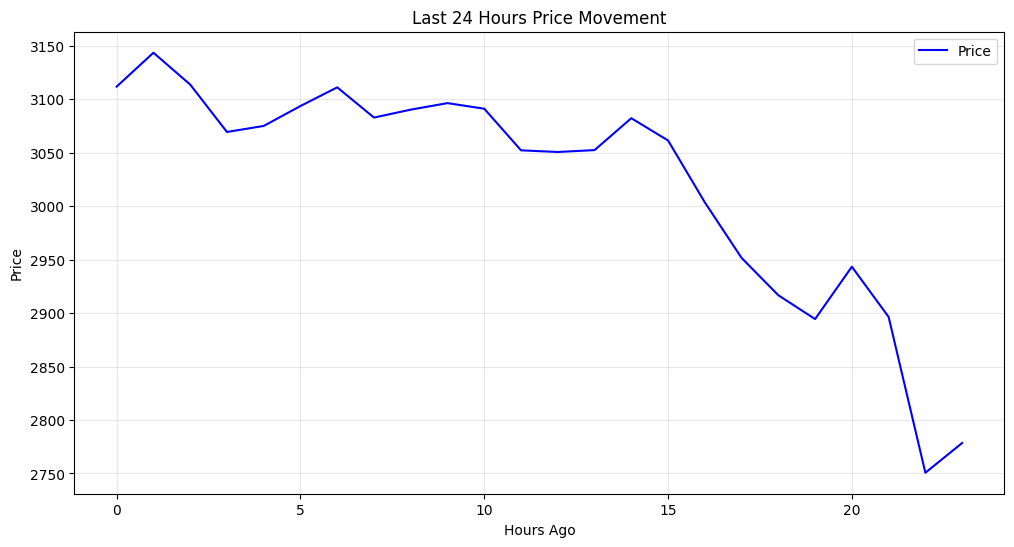


Price Analysis:
Current Price: $2778.49
Predicted Next Hour: $2787.89
Predicted Change: $9.40


In [41]:
import numpy as np
import pandas as pd
import onnxruntime
import matplotlib.pyplot as plt

def predict_single_sequence(sequence_data, onnx_path='../onnx/eth_forecast_1day_model.onnx'):
    """
    Make a single prediction using the ONNX model
    
    Args:
        sequence_data: numpy array of shape (24, 5) containing [open, high, low, close, volume]
        onnx_path: path to the ONNX model file
    
    Returns:
        predicted_return: float, predicted return in percentage
    """
    if sequence_data.shape != (24, 5):
        raise ValueError(f"Expected shape (24, 5), got {sequence_data.shape}")
    
    # Normalize sequence (same as training)
    sequence = sequence_data.astype(np.float32)
    seq_mean = sequence.mean(axis=0, keepdims=True)
    seq_std = sequence.std(axis=0, keepdims=True)
    seq_std[seq_std < 1e-3] = 1.0  # Prevent division by very small numbers
    sequence = (sequence - seq_mean) / seq_std
    
    # Create ONNX Runtime session
    session = onnxruntime.InferenceSession(onnx_path, providers=['CPUExecutionProvider'])
    
    # Run inference (no batch dimension)
    ort_inputs = {session.get_inputs()[0].name: sequence}
    prediction = session.run(['regression_output'], ort_inputs)[0]
    
    return prediction[0]

# Load example data (last 24 hours)
data_path = '../data/ETHUSDT-1h-2022-08-06--2025-02-03.csv'  # Adjust path to be relative to notebook
data = np.loadtxt(data_path, delimiter=',', skiprows=1, usecols=range(5))
latest_sequence = data[-24:]  # Get last 24 hours

# Make prediction
predicted_return = predict_single_sequence(latest_sequence)

# Print results
print(f"\nPrediction Results:")
print(f"{'='*50}")
print(f"Predicted Return: {predicted_return:.2f}%")
print(f"Direction: {'UP 📈' if predicted_return > 0 else 'DOWN 📉'}")
print(f"Confidence: {'High' if abs(predicted_return) > 0.5 else 'Medium' if abs(predicted_return) > 0.2 else 'Low'}")
print(f"{'='*50}")

# Plot the sequence
plt.figure(figsize=(12, 6))
plt.plot(latest_sequence[:, 3], label='Price', color='blue')
plt.title('Last 24 Hours Price Movement')
plt.xlabel('Hours Ago')
plt.ylabel('Price')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Show current price and predicted next hour
current_price = latest_sequence[-1, 3]
predicted_price = current_price * (1 + predicted_return/100)
print(f"\nPrice Analysis:")
print(f"{'='*50}")
print(f"Current Price: ${current_price:.2f}")
print(f"Predicted Next Hour: ${predicted_price:.2f}")
print(f"Predicted Change: ${(predicted_price - current_price):.2f}")


Prediction Results:
Predicted Return: 0.27%
Direction: UP 📈
Confidence: Medium


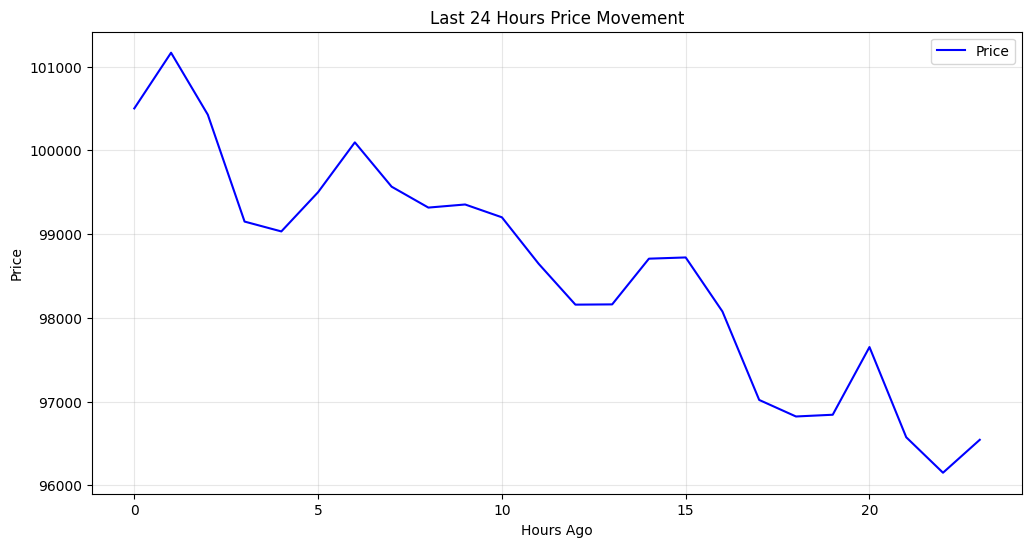


Price Analysis:
Current Price: $96543.10
Predicted Next Hour: $96799.64
Predicted Change: $256.54


In [42]:
import numpy as np
import pandas as pd
import onnxruntime
import matplotlib.pyplot as plt

def predict_single_sequence(sequence_data, onnx_path='../onnx/btc_forecast_1day_model.onnx'):
    """
    Make a single prediction using the ONNX model
    
    Args:
        sequence_data: numpy array of shape (24, 5) containing [open, high, low, close, volume]
        onnx_path: path to the ONNX model file
    
    Returns:
        predicted_return: float, predicted return in percentage
    """
    if sequence_data.shape != (24, 5):
        raise ValueError(f"Expected shape (24, 5), got {sequence_data.shape}")
    
    # Normalize sequence (same as training)
    sequence = sequence_data.astype(np.float32)
    seq_mean = sequence.mean(axis=0, keepdims=True)
    seq_std = sequence.std(axis=0, keepdims=True)
    seq_std[seq_std < 1e-3] = 1.0  # Prevent division by very small numbers
    sequence = (sequence - seq_mean) / seq_std
    
    # Create ONNX Runtime session
    session = onnxruntime.InferenceSession(onnx_path, providers=['CPUExecutionProvider'])
    
    # Run inference (no batch dimension)
    ort_inputs = {session.get_inputs()[0].name: sequence}
    prediction = session.run(['regression_output'], ort_inputs)[0]
    
    return prediction[0]

# Load example data (last 24 hours)
data_path = '../data/BTCUSDT-1h-2022-08-06--2025-02-03.csv'  # Adjust path to be relative to notebook
data = np.loadtxt(data_path, delimiter=',', skiprows=1, usecols=range(5))
latest_sequence = data[-24:]  # Get last 24 hours

# Make prediction
predicted_return = predict_single_sequence(latest_sequence)

# Print results
print(f"\nPrediction Results:")
print(f"{'='*50}")
print(f"Predicted Return: {predicted_return:.2f}%")
print(f"Direction: {'UP 📈' if predicted_return > 0 else 'DOWN 📉'}")
print(f"Confidence: {'High' if abs(predicted_return) > 0.5 else 'Medium' if abs(predicted_return) > 0.2 else 'Low'}")
print(f"{'='*50}")

# Plot the sequence
plt.figure(figsize=(12, 6))
plt.plot(latest_sequence[:, 3], label='Price', color='blue')
plt.title('Last 24 Hours Price Movement')
plt.xlabel('Hours Ago')
plt.ylabel('Price')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Show current price and predicted next hour
current_price = latest_sequence[-1, 3]
predicted_price = current_price * (1 + predicted_return/100)
print(f"\nPrice Analysis:")
print(f"{'='*50}")
print(f"Current Price: ${current_price:.2f}")
print(f"Predicted Next Hour: ${predicted_price:.2f}")
print(f"Predicted Change: ${(predicted_price - current_price):.2f}")


Prediction Results:
Predicted Return: -0.07%
Direction: DOWN 📉
Confidence: Low


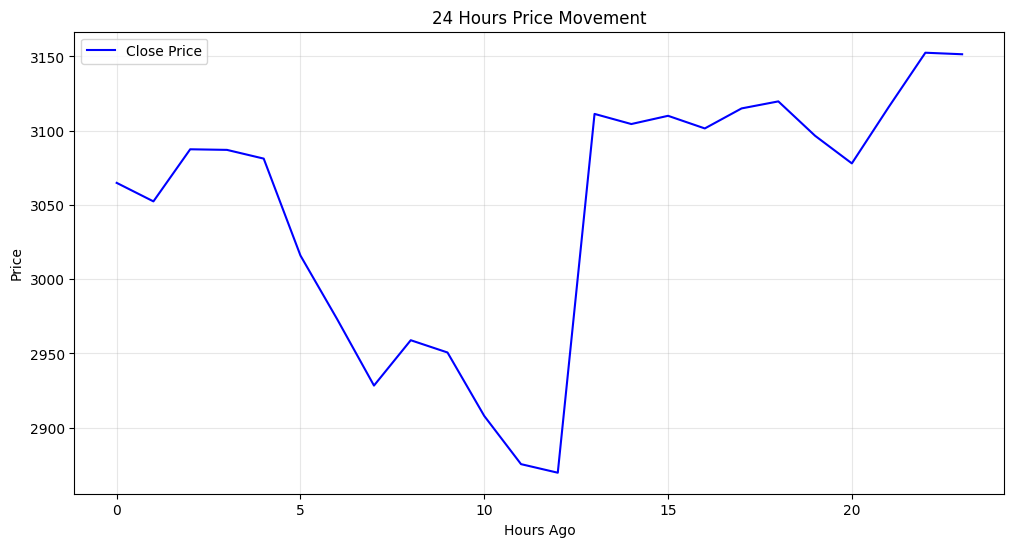


Price Analysis:
Current Price: $3151.46
Predicted Next Hour: $3149.31
Predicted Change: $-2.15


In [44]:
import numpy as np
import onnxruntime
import matplotlib.pyplot as plt

# Define the test sequence
test_sequence = np.array([
    [3104.48, 3112.89, 3052.19, 3064.86, 38775.4157], 
    [3064.87, 3080.39, 3050.64, 3052.39, 41132.0816],
    [3052.40, 3088.13, 3052.40, 3087.47, 22373.8455],
    [3087.47, 3101.92, 3082.23, 3087.07, 25861.5024],
    [3087.08, 3087.08, 3061.41, 3081.19, 21005.6924],
    [3081.18, 3082.02, 3003.53, 3015.90, 60130.3662],
    [3015.90, 3037.00, 2951.58, 2972.99, 117492.0522],
    [2972.99, 2990.50, 2916.66, 2928.36, 103529.5935],
    [2928.36, 2984.00, 2894.40, 2958.90, 90011.2213],
    [2958.91, 2987.68, 2943.34, 2950.64, 27865.7672],
    [2950.64, 2956.82, 2896.40, 2907.90, 48138.9116],
    [2907.90, 2937.17, 2750.71, 2875.46, 119539.8168],
    [2875.46, 2875.46, 2778.49, 2869.68, 130303.5685],  
    [3110.00, 3112.04, 3096.33, 3111.29, 9661.4066],
    [3111.30, 3111.43, 3091.10, 3104.47, 11975.1320],
    [3101.50, 3124.13, 3090.25, 3110.01, 13826.8299],
    [3114.99, 3115.09, 3082.82, 3101.51, 22039.9699],
    [3119.72, 3139.00, 3111.09, 3114.99, 16905.8627],
    [3096.56, 3123.53, 3093.64, 3119.72, 12802.1706],
    [3077.98, 3111.53, 3075.00, 3096.56, 27495.3343],
    [3115.82, 3128.84, 3069.36, 3077.97, 50147.3265],
    [3152.50, 3152.92, 3113.69, 3115.81, 14174.0312],
    [3151.47, 3163.20, 3143.47, 3152.49, 9880.5708],
    [3117.54, 3156.68, 3111.80, 3151.46, 15737.4606]
])

def predict_single_sequence(sequence_data, onnx_path='../onnx/eth_forecast_1day_model.onnx'):
    """
    Make a single prediction using the ONNX model
    """
    if sequence_data.shape != (24, 5):
        raise ValueError(f"Expected shape (24, 5), got {sequence_data.shape}")
    
    # Normalize sequence (same as training)
    sequence = sequence_data.astype(np.float32)
    seq_mean = sequence.mean(axis=0, keepdims=True)
    seq_std = sequence.std(axis=0, keepdims=True)
    seq_std[seq_std < 1e-3] = 1.0  # Prevent division by very small numbers
    sequence = (sequence - seq_mean) / seq_std
    
    # Create ONNX Runtime session
    session = onnxruntime.InferenceSession(onnx_path, providers=['CPUExecutionProvider'])
    
    # Run inference
    ort_inputs = {session.get_inputs()[0].name: sequence}
    prediction = session.run(['regression_output'], ort_inputs)[0]
    
    return prediction[0]

# Make prediction
predicted_return = predict_single_sequence(test_sequence)

# Print results
print(f"\nPrediction Results:")
print(f"{'='*50}")
print(f"Predicted Return: {predicted_return:.2f}%")
print(f"Direction: {'UP 📈' if predicted_return > 0 else 'DOWN 📉'}")
print(f"Confidence: {'High' if abs(predicted_return) > 0.5 else 'Medium' if abs(predicted_return) > 0.2 else 'Low'}")
print(f"{'='*50}")

# Plot the sequence
plt.figure(figsize=(12, 6))
plt.plot(test_sequence[:, 3], label='Close Price', color='blue')
plt.title('24 Hours Price Movement')
plt.xlabel('Hours Ago')
plt.ylabel('Price')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Show current price and predicted next hour
current_price = test_sequence[-1, 3]
predicted_price = current_price * (1 + predicted_return/100)
print(f"\nPrice Analysis:")
print(f"{'='*50}")
print(f"Current Price: ${current_price:.2f}")
print(f"Predicted Next Hour: ${predicted_price:.2f}")
print(f"Predicted Change: ${(predicted_price - current_price):.2f}")